In [104]:
import pandas as pd


c_df = pd.read_csv('./datasets/nba.csv', low_memory=False)
c_df


,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23


In [105]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10990 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

In [106]:
c_df.duplicated().sum()

0

In [107]:
c_df = c_df.drop(labels=['college',
                         'Unnamed: 0',
                         'player_name',
                         'season',
                         'country',
                         'draft_year'
                        ], axis=1)
c_df['pts'] = c_df.pop('pts')

In [108]:
c_df.draft_number.value_counts()

from sklearn.preprocessing import LabelEncoder

# dd = d_df.copy()
columns = ['draft_round', 'draft_number', 'team_abbreviation']
label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(c_df[column])
    label_encoders[column] = encoder.classes_
    c_df.loc[:, column] = result


# label_encoders

In [109]:
c_df.isna().sum()

team_abbreviation    0
age                  0
player_height        0
player_weight        0
draft_round          0
draft_number         0
gp                   0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
pts                  0
dtype: int64

In [110]:
# import numpy as np
# from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

# def get_evaluation(y_test, prediction):
#     MSE = mean_squared_error(y_test, prediction)
#     RMSE = np.sqrt(MSE)
#     MSLE = mean_squared_log_error(y_test, prediction)
#     RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
#     R2 = r2_score(y_test, prediction)
#     print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}, R2: {:.4f}'\
#           .format(MSE, RMSE, MSLE, RMSLE, R2))


import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)

    R2 = r2_score(y_test, prediction)

    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
      .format(MSE, RMSE,  R2))

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train.values, y_train.values)
prediction = l_r.predict(X_test.values)
get_evaluation(y_test.values, prediction)

MSE: 4.4127, RMSE: 2.1006, R2: 0.8778


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'player_height'}>,
        <Axes: title={'center': 'player_weight'}>,
        <Axes: title={'center': 'gp'}>],
       [<Axes: title={'center': 'reb'}>, <Axes: title={'center': 'ast'}>,
        <Axes: title={'center': 'net_rating'}>,
        <Axes: title={'center': 'oreb_pct'}>],
       [<Axes: title={'center': 'dreb_pct'}>,
        <Axes: title={'center': 'usg_pct'}>,
        <Axes: title={'center': 'ts_pct'}>,
        <Axes: title={'center': 'ast_pct'}>],
       [<Axes: title={'center': 'pts'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

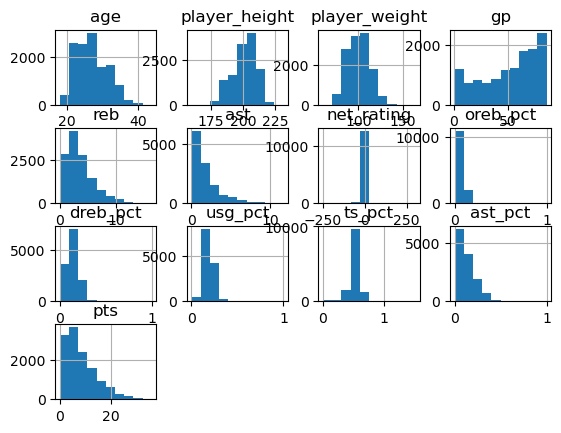

In [97]:
c_df.hist()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'player_height'}>,
        <Axes: title={'center': 'player_weight'}>,
        <Axes: title={'center': 'gp'}>],
       [<Axes: title={'center': 'reb'}>, <Axes: title={'center': 'ast'}>,
        <Axes: title={'center': 'net_rating'}>,
        <Axes: title={'center': 'oreb_pct'}>],
       [<Axes: title={'center': 'dreb_pct'}>,
        <Axes: title={'center': 'usg_pct'}>,
        <Axes: title={'center': 'ts_pct'}>,
        <Axes: title={'center': 'ast_pct'}>],
       [<Axes: title={'center': 'pts'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

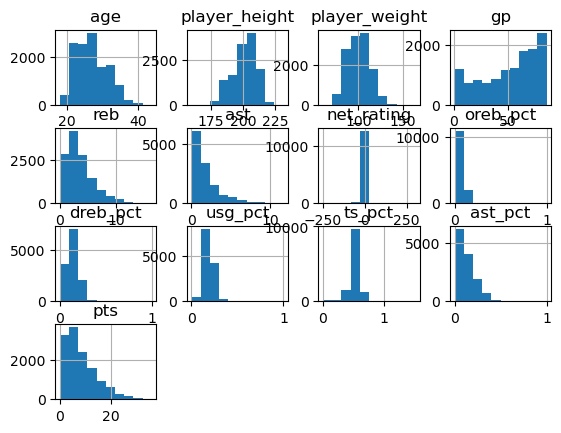

In [98]:
c_df.hist()

In [86]:
# c_df = c_df.drop(labels=['team_abbreviation',
#                          'draft_round',
#                          'draft_number',
#                         ], axis=1)

In [87]:
c_df.corr()['pts'].sort_values(ascending=False)[1:]

ast              0.664320
usg_pct          0.641469
reb              0.624509
gp               0.536003
ts_pct           0.373439
ast_pct          0.337339
net_rating       0.215199
dreb_pct         0.055669
age              0.011353
player_weight   -0.025023
player_height   -0.055284
oreb_pct        -0.125164
Name: pts, dtype: float64

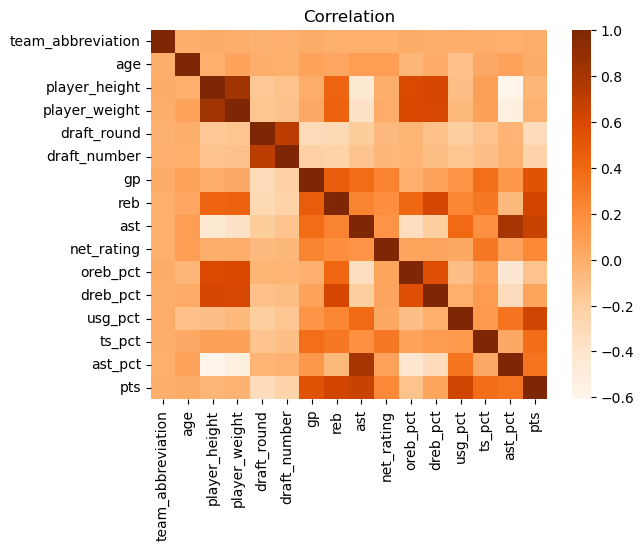

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = c_df.corr()
corr_hmap = sns.heatmap(corr, cmap='Oranges')
corr_hmap.set_title('Correlation')
plt.show()

In [68]:
corr['pts'].sort_values(ascending=False)[1:]

ast                  0.664320
usg_pct              0.641469
reb                  0.624509
gp                   0.536003
ts_pct               0.373439
ast_pct              0.337339
net_rating           0.215199
dreb_pct             0.055669
age                  0.011353
team_abbreviation   -0.005176
player_weight       -0.025023
player_height       -0.055284
oreb_pct            -0.125164
draft_number        -0.240066
draft_round         -0.315555
Name: pts, dtype: float64

<Axes: xlabel='ast', ylabel='pts'>

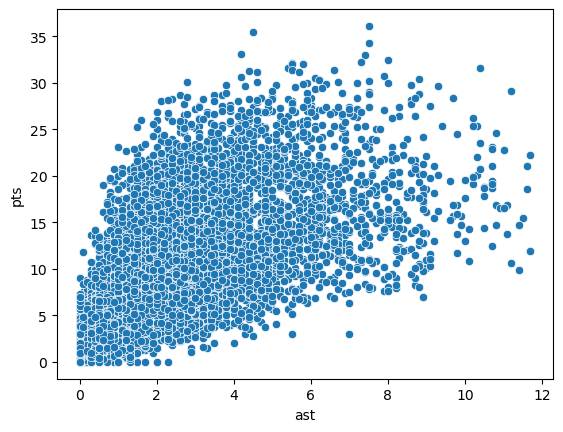

In [12]:
import seaborn as sns

sns.scatterplot(x= 'ast' , y='pts', data=c_df)

In [111]:

c_df['team_abbreviation'] = pd.to_numeric(c_df['team_abbreviation'], errors='coerce').fillna(0).astype(int)
c_df['draft_round'] = pd.to_numeric(c_df['draft_round'], errors='coerce').fillna(0).astype(int)
c_df['draft_number'] = pd.to_numeric(c_df['draft_number'], errors='coerce').fillna(0).astype(int)

In [100]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]
for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

DecisionTreeRegressor
MSE: 3.3009, RMSE: 1.8168, R2: 0.9086
RandomForestRegressor
MSE: 1.1365, RMSE: 1.0661, R2: 0.9685
GradientBoostingRegressor
MSE: 1.1716, RMSE: 1.0824, R2: 0.9676
XGBRegressor
MSE: 0.7149, RMSE: 0.8455, R2: 0.9802
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2094
[LightGBM] [Info] Number of data points in the train set: 10275, number of used features: 15
[LightGBM] [Info] Start training from score 8.207144
LGBMRegressor
MSE: 0.5767, RMSE: 0.7594, R2: 0.9840


In [50]:
import matplotlib.pyplot as plt

lgb_r.fit(X_train, y_train)
prediction = lgb_r.predict(X_train)
get_evaluation(y_train, prediction)

fig, ax = plt.subplots()
ax.scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
plt.show()

AttributeError: 'Linear' object has no attribute 'fit'

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000517 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2094
[LightGBM] [Info] Number of data points in the train set: 10275, number of used features: 15
[LightGBM] [Info] Start training from score 8.207144
MSE: 0.5767, RMSE: 0.7594, R2: 0.9840


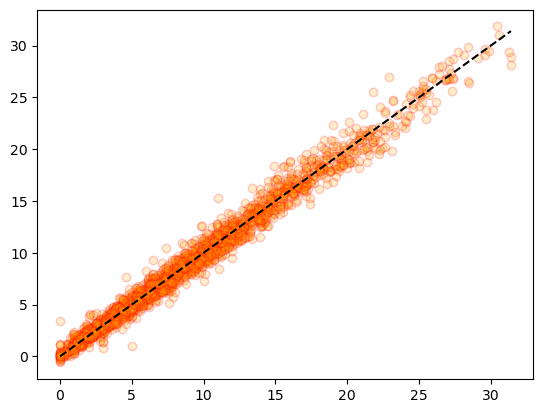

In [112]:
import matplotlib.pyplot as plt

lgb_r.fit(X_train, y_train)
prediction = lgb_r.predict(X_test)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

In [79]:
import matplotlib.pyplot as plt

l_r.fit(X_train, y_train)
prediction = l_r.predict(X_train)
get_evaluation(y_test, prediction)

fig, ax = plt.subplots()
ax.scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [2569, 10275]

In [73]:
from sklearn.decomposition import PCA

for i in range(10):
    pca = PCA(n_components=(i + 1))
    
    pca_train = pca.fit_transform(features)
    pca_test = pca.fit_transform(features)

    print(pca.explained_variance_ratio_.sum())

0.43366745053840516
0.7123418763085761
0.8322293827365156
0.9148113860515423
0.9740154976135068
0.9857876738338268
0.995088020951132
0.9974271996472123
0.9991965612993078
0.9999914251694169


In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression


features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)
ridge = Ridge(alpha=10000, random_state=124)  # alpha는 규제 강도를 조절하는 하이퍼파라미터입니다.

models = [l_r, dt_r, rf_r, gb_r, xgb_r, lgb_r, ridge]
for model in models:
    pipe = Pipeline([(f'{model.__class__.__name__}', model)])
    pipe.fit(X_train, y_train)
    prediction = pipe.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

LinearRegression
MSE: 4.4127, RMSE: 2.1006, R2: 0.8778
DecisionTreeRegressor
MSE: 3.3009, RMSE: 1.8168, R2: 0.9086
RandomForestRegressor
MSE: 1.1365, RMSE: 1.0661, R2: 0.9685
GradientBoostingRegressor
MSE: 1.1716, RMSE: 1.0824, R2: 0.9676


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:team_abbreviation: object, draft_round: object, draft_number: object

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2).fit_transform(features)

X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)
get_evaluation(y_test.values, prediction)

### 1회차

- 이정도면 선형이라고 생각함 / log 작업 하면 더 이쁘게 나올듯?
- 추가로 차원 축소 / 안한거 버전 2개로 작업하면 좋을듯?
- 지속적으로 과적합인지는 확인해봐야할듯

In [ ]:
from sklearn.preprocessing import PowerTransformer

ccc = c_df.columns

# box-cox: 양수만 가능
# yeo-johnson: 음수, 0 포함 가능, default

# ptf = PowerTransformer(method='box-cox', standardize=False)
ptf = PowerTransformer(standardize=False)


for i in ccc:
    result = ptf.fit_transform(c_df[[i]])
    c_df[i] = result

# result = ptf.fit_transform(c_df[['price']])
# c_df['price'] = result

# result = ptf.fit_transform(c_df[['bedrooms']])
# c_df['bedrooms'] = result

# result = ptf.fit_transform(c_df[['baths']])
# c_df['baths'] = result


In [ ]:
c_df.hist()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

l_r = LinearRegression()
l_r.fit(X_train.values, y_train.values)
prediction = l_r.predict(X_test.values)
get_evaluation(y_test.values, prediction)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression


features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

p_l_r = LinearRegression()
dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)
ridge = Ridge(alpha=10000, random_state=124)  # alpha는 규제 강도를 조절하는 하이퍼파라미터입니다.

models = [p_l_r, dt_r, rf_r, gb_r, xgb_r, lgb_r, ridge]
for model in models:
    pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=5)), (f'{model.__class__.__name__}', model)])
    pipe.fit(X_train, y_train)
    prediction = pipe.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

In [ ]:
import matplotlib.pyplot as plt

# 첫 번째 그래프
l_r.fit(X_train, y_train)
prediction_train = l_r.predict(X_train)
get_evaluation(y_train, prediction_train)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 훈련 데이터 예측 결과
axs[0].scatter(y_train, prediction_train, edgecolors='red', c='orange', alpha=0.2)
axs[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
axs[0].set_title('Training Data')

# 두 번째 그래프
l_r.fit(X_train, y_train)
prediction_test = l_r.predict(X_test)
get_evaluation(y_test, prediction_test)

# 테스트 데이터 예측 결과
axs[1].scatter(y_test, prediction_test, edgecolors='red', c='orange', alpha=0.2)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axs[1].set_title('Test Data')

plt.show()


In [ ]:
import matplotlib.pyplot as plt

# 첫 번째 그래프
p_l_r.fit(X_train, y_train)
prediction_train = p_l_r.predict(X_train)
get_evaluation(y_train, prediction_train)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# 훈련 데이터 예측 결과
axs[0].scatter(y_train, prediction_train, edgecolors='red', c='orange', alpha=0.2)
axs[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
axs[0].set_title('Training Data')

# 두 번째 그래프
p_l_r.fit(X_train, y_train)
prediction_test = p_l_r.predict(X_test)
get_evaluation(y_test, prediction_test)

# 테스트 데이터 예측 결과
axs[1].scatter(y_test, prediction_test, edgecolors='red', c='orange', alpha=0.2)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axs[1].set_title('Test Data')

plt.show()


### 2회차

- 이정도면 정말 잘나오는듯? 과적합도 아닌거같고
- 차원축소 / 안한거 버전 2개로 발표합시다 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression


features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

p_l_r = LinearRegression()
dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor()
lgb_r = LGBMRegressor(n_estimators=100)
ridge = Ridge(alpha=10000, random_state=124)  # alpha는 규제 강도를 조절하는 하이퍼파라미터입니다.

models = [p_l_r, dt_r, rf_r, gb_r, xgb_r, lgb_r, ridge]
for model in models:
    pipe = Pipeline([('std', StandardScaler()), ('pca', PCA(n_components=5)), (f'{model.__class__.__name__}', model)])
    pipe.fit(X_train, y_train)
    prediction = pipe.predict(X_test)
    print(model.__class__.__name__)
    get_evaluation(y_test, prediction)

In [69]:
import torch
from torch.optim import SGD
from torch.nn.functional import mse_loss
from torch.nn import Linear

torch.manual_seed(321)

features, targets = c_df.iloc[:,:-1],c_df.iloc[:,-1]

X_train, X_test, y_train, y_test = \
train_test_split(features,targets, test_size=0.2, random_state=321)

real_X_train, val_X_test, real_y_train, val_y_test = \
train_test_split(X_train, y_train, test_size=0.5, random_state=321)

real_X_train = torch.FloatTensor(X_train.values)
real_y_train = torch.FloatTensor(y_train.values).view(-1, 1)

val_X_test = torch.FloatTensor(X_test.values)
val_y_test = torch.FloatTensor(y_test.values).view(-1, 1)
l_r = Linear(real_X_train.shape[1], 1)  # 입력 차원 동적 할당
optimizer = SGD(l_r.parameters(), lr=1e-3)  # 보다 실용적인 학습률

epochs = 1000000  # 적절한 에포크 수
real_train_loss_history = []
val_test_loss_history = []

for epoch in range(1, epochs + 1):
    l_r.train()
    H = l_r(real_X_train)
    train_loss = mse_loss(real_y_train, H)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    l_r.eval()
    with torch.no_grad():
        H_test = l_r(val_X_test)
        test_loss = mse_loss(val_y_test, H_test)
        r2 = r2_score(val_y_test, H_test)
    
    real_train_loss_history.append(train_loss.item())
    val_test_loss_history.append(test_loss.item())

    # if epoch % 10000 == 0:
    #     print(f'{epoch}/{epochs}: ', end='')
    #     W = l_r.weight.data.squeeze()
    #     b = l_r.bias.data
    #     for i, w in enumerate(W):
    #         print(f'W{i+1}: {w:.4f}, ', end='')
    #     print(f'b: {b.item():.4f}, Loss: {train_loss.item():.4f}\n')
    if epoch % 10000 == 0:
        print(f'{epoch}/{epochs}: ', end='')
        W = l_r.weight.data.squeeze()
        b = l_r.bias.data
        for i, w in enumerate(W):
            print(f'W{i+1}: {w:.4f}, ', end='')
        print(f'b: {b.item():.4f}, Loss: {test_loss.item():.4f}\n')
        print(f'Test Loss: {test_loss.item():.4f}, R-squared: {r2.item():.4f}')


TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(real_train_loss_history, label='Training Loss', linewidth=10, color= 'skyblue')
plt.plot(val_test_loss_history, label='Val Loss', linestyle='--' , linewidth=5, alpha=0.3, color='red')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Loss Trend Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
negative_pts = c_df[c_df['pts'] == 'Nan']

if not negative_pts.empty:
    print("음수 값이 존재합니다:")
    print(negative_pts)
else:
    print("음수 값이 존재하지 않습니다.")

음수 값이 존재하지 않습니다.


In [49]:
if c_df['pts'].isnull().any():
    c_df['pts'] = c_df['pts'].fillna(0)

torch.manual_seed(321)

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=321)

real_X_train, val_X_test, real_y_train, val_y_test = train_test_split(X_train, y_train, test_size=0.5, random_state=321)

real_X_train = torch.FloatTensor(real_X_train.values)
real_y_train = torch.FloatTensor(real_y_train.values).view(-1, 1)

val_X_test = torch.FloatTensor(val_X_test.values)
val_y_test = torch.FloatTensor(val_y_test.values).view(-1, 1)

l_r = Linear(real_X_train.shape[1], 1)  # 입력 차원 동적 할당
optimizer = SGD(l_r.parameters(), lr=1e-3)  # 보다 실용적인 학습률

epochs = 100000  # 적절한 에포크 수
real_train_loss_history = []
val_test_loss_history = []

for epoch in range(1, epochs + 1):
    l_r.train()
    H = l_r(real_X_train)
    train_loss = mse_loss(H, real_y_train)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    l_r.eval()
    with torch.no_grad():
        H_test = l_r(val_X_test)
        test_loss = mse_loss(H_test, val_y_test)
        r2 = r2_score(val_y_test.numpy(), H_test.numpy())
    
    real_train_loss_history.append(train_loss.item())
    val_test_loss_history.append(test_loss.item())

    if epoch % 10000 == 0:
        print(f'{epoch}/{epochs}: ', end='')
        W = l_r.weight.data.squeeze()
        b = l_r.bias.data
        for i, w in enumerate(W):
            print(f'W{i+1}: {w:.4f}, ', end='')
        print(f'b: {b.item():.4f}, Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')
        print(f'Test Loss: {test_loss.item():.4f}, R-squared: {r2:.4f}')

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0, dtype=np.float64)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:927: RuntimeWarning: overflow encountered in square
  numerator = (weight * (y_true - y_pred) ** 2).sum(axis=0

ValueError: Input contains NaN.

In [82]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)

kfold = KFold(n_splits=10, shuffle=True, random_state=124)
l_r = LinearRegression()
score = cross_val_score(l_r, X_train, y_train, cv=kfold, scoring='r2')
print(score)
print(np.round(np.mean(score), 4))
print(get_evaluation(y_test, prediction))

[0.86515288 0.87661636 0.80813591 0.85532394 0.87425778 0.87881195
 0.88251871 0.89855411 0.89778109 0.85269512]
0.869
MSE: 1.1716, RMSE: 1.0824, R2: 0.9676
None


In [77]:
l_r.fit(X_train, y_train)
prediction = l_r.predict(X_test)


MSE: 4.4127, RMSE: 2.1006, R2: 0.8778


In [78]:
print(get_evaluation(y_test, prediction))

MSE: 4.4127, RMSE: 2.1006, R2: 0.8778
None


In [63]:
from sklearn.preprocessing import PowerTransformer

ccc = c_df.columns

# box-cox: 양수만 가능
# yeo-johnson: 음수, 0 포함 가능, default

# ptf = PowerTransformer(method='box-cox', standardize=False)
ptf = PowerTransformer(standardize=False)


for i in ccc:
    result = ptf.fit_transform(c_df[[i]])
    c_df[i] = result

In [64]:
c_df = c_df.drop(labels=['team_abbreviation',
                         'draft_round',
                         'draft_number',
                        ], axis=1)

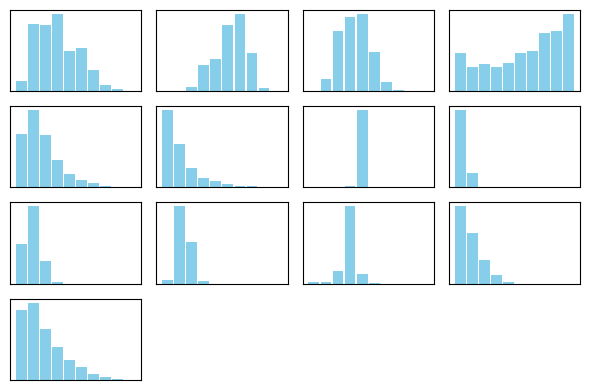

In [85]:
import matplotlib.pyplot as plt

# 데이터프레임의 히스토그램 생성
ax = c_df.hist(grid=False, figsize=(6, 4), color='skyblue', zorder=2, rwidth=0.9)

# 각 서브플롯에 대해 반복
for x in ax.flatten():
    # 축 레이블 제거
    x.set_xlabel("")
    x.set_ylabel("")
    
    # 타이틀 제거
    x.set_title("")
    
    # 축 틱 제거
    x.tick_params(axis='both', which='both', length=0)
    # 축에서 틱 레이블 숨기기
    x.set_xticklabels([])
    x.set_yticklabels([])

plt.tight_layout()  # 그래프 레이아웃을 조정하여 겹치는 부분 최소화
plt.show()  # 그래프 표시


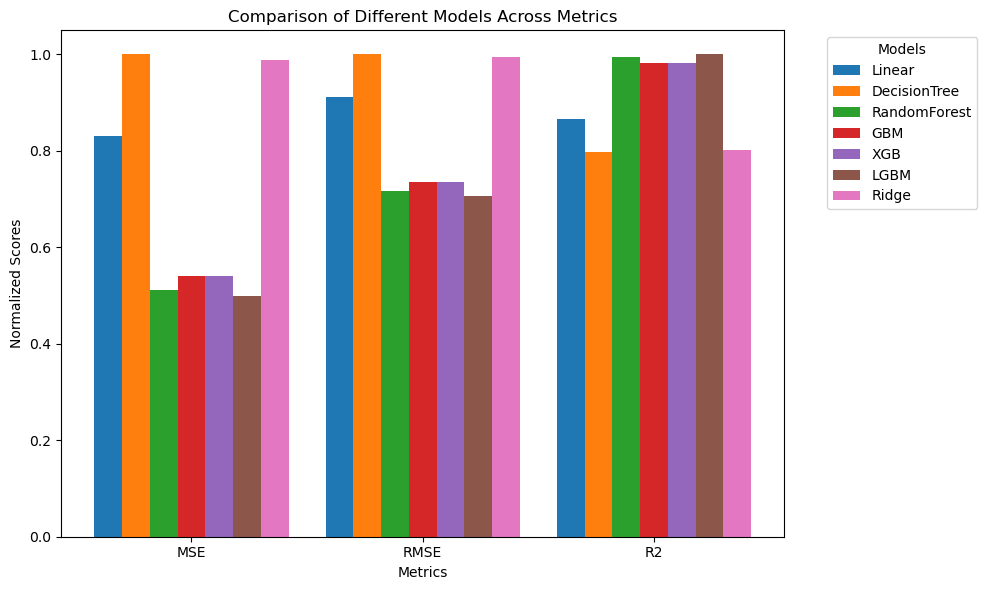

In [103]:
import matplotlib.pyplot as plt
import numpy as np

# Data setup
metrics = ['MSE', 'RMSE', 'R2']
models = ['Linear', 'DecisionTree', 'RandomForest', 'GBM', 'XGB', 'LGBM', 'Ridge']
values = [
    [10.0813, 12.1323, 6.2177, 6.5642, 6.5710, 6.0635, 11.9995],  # MSE
    [3.1751, 3.4832, 2.4935, 2.5621, 2.5634, 2.4624, 3.4640],     # RMSE
    [0.7208, 0.6640, 0.8278, 0.8182, 0.8180, 0.8321, 0.6677]      # R2
]

# Normalizing the data for better visualization
values_normalized = [[y / max(x) for y in x] for x in values]

# Setting up for a grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.12  # Narrower bar width to fit all models in each group
index = np.arange(len(metrics))  # The label locations for the metrics

# Create bars for each model within each metric group
for i, model in enumerate(models):
    rects = ax.bar(index + i * bar_width, [values_normalized[j][i] for j in range(len(metrics))],
                   bar_width, label=model)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Normalized Scores')
ax.set_title('Comparison of Different Models Across Metrics')
ax.set_xticks(index + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
ax.legend(title="Models", bbox_to_anchor=(1.05, 1), loc='upper left')

fig.tight_layout()
plt.show()


In [113]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)
X_train_val, X_test_val, y_train_val, y_test_val =\
    train_test_split(X_train, y_train, test_size=0.5, random_state=124)

kfold = KFold(n_splits=10, shuffle=True, random_state=124)
xgb_r = XGBRegressor()
score = cross_val_score(xgb_r, X_train, y_train, cv=kfold, scoring='r2')
print(score)
print(np.round(np.mean(score), 4))
print(get_evaluation(y_test, prediction))

[0.97583474 0.98064766 0.97625261 0.97881219 0.98262291 0.9792734
 0.9831275  0.98224463 0.97991811 0.97640214]
0.9795
MSE: 0.5767, RMSE: 0.7594, R2: 0.9840
None


In [123]:
import torch
from torch.optim import SGD
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)
X_train_val, X_test_val, y_train_val, y_test_val =\
    train_test_split(X_train, y_train, test_size=0.2, random_state=124)

X_train_val = torch.FloatTensor(X_train_val.values)
y_train_val = torch.FloatTensor(y_train_val.values).view(-1, 1)

X_test_val = torch.FloatTensor(X_test_val.values)
y_test_val = torch.FloatTensor(y_test_val.values).view(-1, 1)

train_losses = []
val_losses = []

# W_train = torch.nn.Parameter(torch.FloatTensor(l_r.coef_))
# b_train = torch.nn.Parameter(torch.tensor(l_r.intercept_))
W_train = torch.zeros((4, 1), requires_grad=True)
b_train = torch.zeros(1, requires_grad=True)

W_val = torch.zeros((4, 1), requires_grad=True)
b_val = torch.zeros(1, requires_grad=True)

optimizer_train = SGD([W_train, b_train], lr=0.0001)
optimizer_val = SGD([W_val, b_val], lr=0.0001)


In [132]:
import torch
from torch.optim import SGD
from sklearn.model_selection import train_test_split

torch.manual_seed(124)

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)
X_train_val, X_test_val, y_train_val, y_test_val =\
    train_test_split(X_train, y_train, test_size=0.2, random_state=124)

X_train_val = torch.FloatTensor(X_train_val.values)
y_train_val = torch.FloatTensor(y_train_val.values).view(-1, 1)

X_test_val = torch.FloatTensor(X_test_val.values)
y_test_val = torch.FloatTensor(y_test_val.values).view(-1, 1)

train_losses = []
val_losses = []

# W_train = torch.nn.Parameter(torch.FloatTensor(l_r.coef_))
# b_train = torch.nn.Parameter(torch.tensor(l_r.intercept_))
W_train = torch.zeros((15, 1), requires_grad=True)
b_train = torch.zeros(1, requires_grad=True)

W_val = torch.zeros((15, 1), requires_grad=True)
b_val = torch.zeros(1, requires_grad=True)

optimizer_train = SGD([W_train, b_train], lr=0.000001)
optimizer_val = SGD([W_val, b_val], lr=0.000001)


In [133]:
epochs = 100000

for epoch in range(1, epochs + 1):
    H_train = X_train_val.matmul(W_train) + b_train
    loss_train = torch.mean((y_train_val - H_train) ** 2)

    optimizer_train.zero_grad()
    loss_train.backward()
    optimizer_train.step()

    if epoch % 100 == 0:
        train_losses.append(loss_train.item())

    if epoch % 10000 == 0:
        print('{:4d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, W4: {:.4f}, b: {:.4f}, loss: {:.4f}'\
            .format(epoch, epochs, W_train[0].item(), W_train[1].item(), \
                    W_train[2].item(), W_train[3].item(), b_train.item(), loss_train.item()))

10000/100000: W1: -0.0062, W2: 0.0038, W3: 0.0264, W4: -0.0231, b: 0.0006, loss: 22.7652
20000/100000: W1: -0.0074, W2: 0.0017, W3: 0.0311, W4: -0.0334, b: 0.0010, loss: 21.1081
30000/100000: W1: -0.0073, W2: -0.0007, W3: 0.0331, W4: -0.0387, b: 0.0014, loss: 19.7006
40000/100000: W1: -0.0070, W2: -0.0030, W3: 0.0343, W4: -0.0423, b: 0.0018, loss: 18.5005
50000/100000: W1: -0.0066, W2: -0.0051, W3: 0.0352, W4: -0.0452, b: 0.0022, loss: 17.4760
60000/100000: W1: -0.0063, W2: -0.0071, W3: 0.0358, W4: -0.0476, b: 0.0025, loss: 16.6009
70000/100000: W1: -0.0059, W2: -0.0089, W3: 0.0364, W4: -0.0497, b: 0.0029, loss: 15.8527
80000/100000: W1: -0.0056, W2: -0.0106, W3: 0.0368, W4: -0.0515, b: 0.0033, loss: 15.2124
90000/100000: W1: -0.0054, W2: -0.0123, W3: 0.0372, W4: -0.0530, b: 0.0036, loss: 14.6639
100000/100000: W1: -0.0051, W2: -0.0139, W3: 0.0375, W4: -0.0543, b: 0.0040, loss: 14.1936


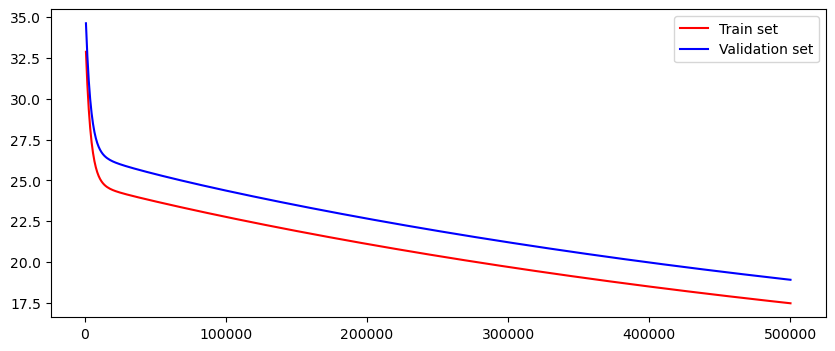

In [135]:
import matplotlib.pyplot as plt

train_loss_dict = dict()
val_loss_dict = dict()

for i in range(500):
    train_loss_dict[(i+1)*1000] = train_losses[i]
    val_loss_dict[(i+1)*1000] = val_losses[i]
plt.figure(figsize=(10, 4))
plt.plot(train_loss_dict.keys(), train_loss_dict.values(), color='r', label='Train set')
plt.plot(val_loss_dict.keys(), val_loss_dict.values(), color='b', label='Validation set')
plt.legend()
plt.show()

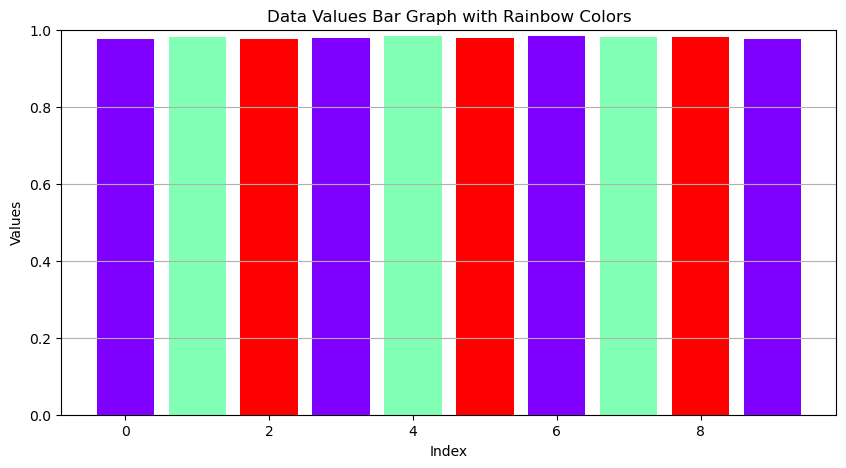

In [122]:
colors = plt.cm.rainbow(np.linspace(0, 1, len(values))) # Generating a rainbow color palette
values=[0.97583474, 0.98064766 ,0.97625261, 0.97881219, 0.98262291 ,0.9792734,
0.9831275 ,0.98224463, 0.97991811 ,0.97640214]
plt.figure(figsize=(10, 5))
plt.bar(range(len(values)), values, color=colors)
plt.title('Data Values Bar Graph with Rainbow Colors')
plt.xlabel('Index')
plt.ylabel('Values')
plt.ylim(0, 1) # Setting y-axis limits from 0 to 1
plt.grid(True, axis='y')
plt.show()

In [137]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=124)
X_train_val, X_test_val, y_train_val, y_test_val =\
    train_test_split(X_train, y_train, test_size=0.5, random_state=124)

MSE: 0.2860, RMSE: 0.5348, R2: 0.9921
MSE: 0.7149, RMSE: 0.8455, R2: 0.9802
MSE: 0.1259, RMSE: 0.3548, R2: 0.9966


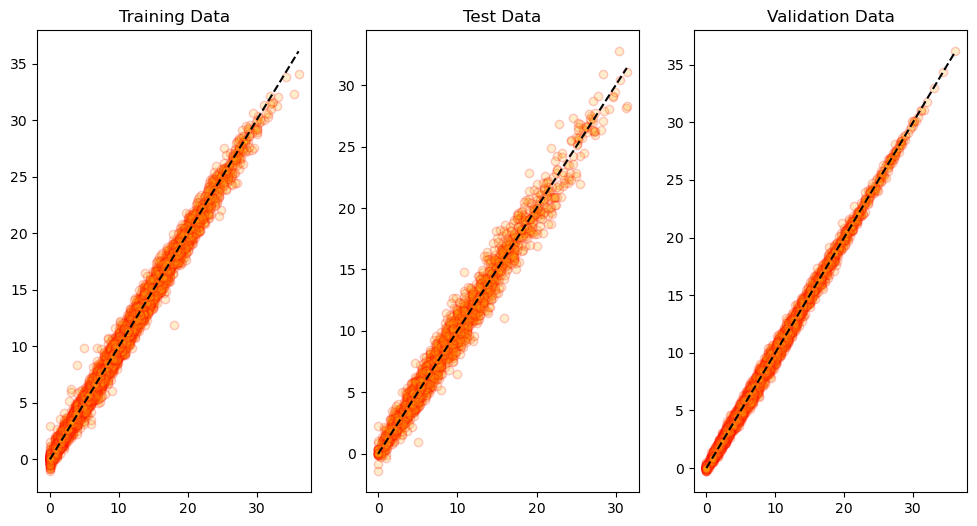

In [138]:
import matplotlib.pyplot as plt

# 모델 훈련 및 평가
xgb_r.fit(X_train, y_train)
prediction_train = lgb_r.predict(X_train)
get_evaluation(y_train, prediction_train)

fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# 첫 번째 그래프: 훈련 데이터 예측 결과
axs[0].scatter(y_train, prediction_train, edgecolors='red', c='orange', alpha=0.2)
axs[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
axs[0].set_title('Training Data')

# 두 번째 그래프: 테스트 데이터 예측 결과
prediction_test = xgb_r.predict(X_test)
get_evaluation(y_test, prediction_test)

axs[1].scatter(y_test, prediction_test, edgecolors='red', c='orange', alpha=0.2)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axs[1].set_title('Test Data')

# 세 번째 그래프: 검증 데이터 예측 결과
prediction_val = xgb_r.predict(X_train_val)
get_evaluation(y_train_val, prediction_val)

axs[2].scatter(y_train_val, prediction_val, edgecolors='red', c='orange', alpha=0.2)
axs[2].plot([y_train_val.min(), y_train_val.max()], [y_train_val.min(), y_train_val.max()], 'k--')
axs[2].set_title('Validation Data')

plt.show()
5767 7594 9840